# Import libraries and data

In [6]:
%pip install numpy pandas matplotlib seaborn scikit-learn lightgbm

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ----------------------------- ---------- 1.0/1.4 MB 7.1 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 7.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, confusion_matrix, f1_score, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay  # Updated imports

from lightgbm import LGBMClassifier, plot_importance

In [9]:
# Load data
data = pd.read_csv('../data engineering/reporting/promotion_report.csv')
data

,employee_id,name,email,designation,age,length_of_service,is_promoted,no_of_trainings,avg_training_score
0,65438,Liam Kelly,liam@gmail.com,Sales & Marketing,35,8,0,10,49.0
1,65141,Uma Taylor,uma@gmail.com,Operations,30,4,0,10,60.0
2,7513,Quincy Davis,quincy@gmail.com,Sales & Marketing,34,7,0,10,50.0
3,2542,Rachel Smith,rachel@gmail.com,Sales & Marketing,39,10,0,10,50.0
4,48945,Sam Smith,sam@gmail.com,Technology,45,2,0,10,73.0
...,...,...,...,...,...,...,...,...,...
54803,3030,Yvonne Edwards,yvonne_edwards515@gmail.com,Technology,48,17,0,10,78.0
54804,74592,Isabella Phillips,isabella_phillips151@gmail.com,Operations,37,6,0,10,56.0
54805,13918,Catherine Martinez,catherine_martinez355@gmail.com,Analytics,27,3,0,10,79.0
54806,13614,Noah Edwards,noah_edwards12@gmail.com,Sales & Marketing,29,2,0,10,NaN


## Dataset Overview
|        Column        |                                         Descriptions                                        |
|:--------------------:|:-------------------------------------------------------------------------------------------:|
| employee_id          | Unique ID for the employee                                                                  |
| department           | Department of employee                                                                      |
| region               | Region of employment(unordered)                                                             |
| education            | Education level                                                                             |
| gender               | Gender of Employee                                                                          |
| recruitment_channel  | Channel of recruitment for employee                                                         |
| no_of_trainings      | no of other trainings completed in the previous year on soft skills, technical skills, etc. |
| age                  | Age of Employee                                                                             |
| previous_year_rating | Employee Rating for the previous year                                                       |
| length_of_service    | Length of service in years                                                                  |
| awards_won           | if awards won during the previous year then 1 else 0                                        |
| avg_training_score   | Average score in current training evaluations                                               |
| is_promoted          | Recommended for promotion                                                                   |

# Data Preprocessing

In [10]:
# Check whether any columns contain NaN or Null values
data.isnull().sum()

employee_id              0
name                     0
email                    0
designation              0
age                      0
length_of_service        0
is_promoted              0
no_of_trainings          0
avg_training_score    2560
dtype: int64

In [11]:
# We have lots of data, specifically over 10000
# Therefore, I decided to drop rows contain NaN or Null
data.dropna(axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)
data

,employee_id,name,email,designation,age,length_of_service,is_promoted,no_of_trainings,avg_training_score
0,65438,Liam Kelly,liam@gmail.com,Sales & Marketing,35,8,0,10,49.0
1,65141,Uma Taylor,uma@gmail.com,Operations,30,4,0,10,60.0
2,7513,Quincy Davis,quincy@gmail.com,Sales & Marketing,34,7,0,10,50.0
3,2542,Rachel Smith,rachel@gmail.com,Sales & Marketing,39,10,0,10,50.0
4,48945,Sam Smith,sam@gmail.com,Technology,45,2,0,10,73.0
...,...,...,...,...,...,...,...,...,...
52243,6915,Quincy Thompson,quincy_thompson992@gmail.com,Sales & Marketing,31,2,0,10,49.0
52244,3030,Yvonne Edwards,yvonne_edwards515@gmail.com,Technology,48,17,0,10,78.0
52245,74592,Isabella Phillips,isabella_phillips151@gmail.com,Operations,37,6,0,10,56.0
52246,13918,Catherine Martinez,catherine_martinez355@gmail.com,Analytics,27,3,0,10,79.0


In [12]:
# 'emplye_id' column is unnecessary so, I gonna drop for it
data.drop(columns=['employee_id'], inplace=True)
data

,name,email,designation,age,length_of_service,is_promoted,no_of_trainings,avg_training_score
0,Liam Kelly,liam@gmail.com,Sales & Marketing,35,8,0,10,49.0
1,Uma Taylor,uma@gmail.com,Operations,30,4,0,10,60.0
2,Quincy Davis,quincy@gmail.com,Sales & Marketing,34,7,0,10,50.0
3,Rachel Smith,rachel@gmail.com,Sales & Marketing,39,10,0,10,50.0
4,Sam Smith,sam@gmail.com,Technology,45,2,0,10,73.0
...,...,...,...,...,...,...,...,...
52243,Quincy Thompson,quincy_thompson992@gmail.com,Sales & Marketing,31,2,0,10,49.0
52244,Yvonne Edwards,yvonne_edwards515@gmail.com,Technology,48,17,0,10,78.0
52245,Isabella Phillips,isabella_phillips151@gmail.com,Operations,37,6,0,10,56.0
52246,Catherine Martinez,catherine_martinez355@gmail.com,Analytics,27,3,0,10,79.0


In [6]:
# Convert 'gender' column into binary values
data['gender_new'] = pd.Series()
data.loc[data['gender'] == 'f', 'gender_new'] = 0
data.loc[data['gender'] == 'm', 'gender_new'] = 1
data = data.astype({'gender_new' : 'int'})
data.drop(columns=['gender'], inplace=True)
data

,department,region,education,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,gender_new
0,Sales & Marketing,region_7,Master's & above,sourcing,1,35,5.0,8,0,49.0,0,0
1,Operations,region_22,Bachelor's,other,1,30,5.0,4,0,60.0,0,1
2,Sales & Marketing,region_19,Bachelor's,sourcing,1,34,3.0,7,0,50.0,0,1
3,Sales & Marketing,region_23,Bachelor's,other,2,39,1.0,10,0,50.0,0,1
4,Technology,region_26,Bachelor's,other,1,45,3.0,2,0,73.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
46375,Sales & Marketing,region_14,Bachelor's,other,2,31,1.0,2,0,49.0,0,1
46376,Technology,region_14,Bachelor's,sourcing,1,48,3.0,17,0,78.0,0,1
46377,Operations,region_27,Master's & above,other,1,37,2.0,6,0,56.0,0,0
46378,Analytics,region_1,Bachelor's,other,1,27,5.0,3,0,79.0,0,1


## Comment
Finally, we got preprocessed DataFrame named 'data'.  
It has no NaN or Null values, therefore it is good to go for machine learning.

# Data Visualization

In [13]:
# Check distributions of features for training by pie charts
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(40, 20))

for i, feature in enumerate(data.columns):
    row = int(i/4)
    col = i%4
    pd.value_counts(data.iloc[:, i]).plot.pie(autopct="%.1f%%", ax=axs[row][col])

plt.suptitle('Distribution of features')
plt.tight_layout()

Error in callback <function flush_figures at 0x000002B891BCC900> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

IndexError: index 3 is out of bounds for axis 0 with size 3

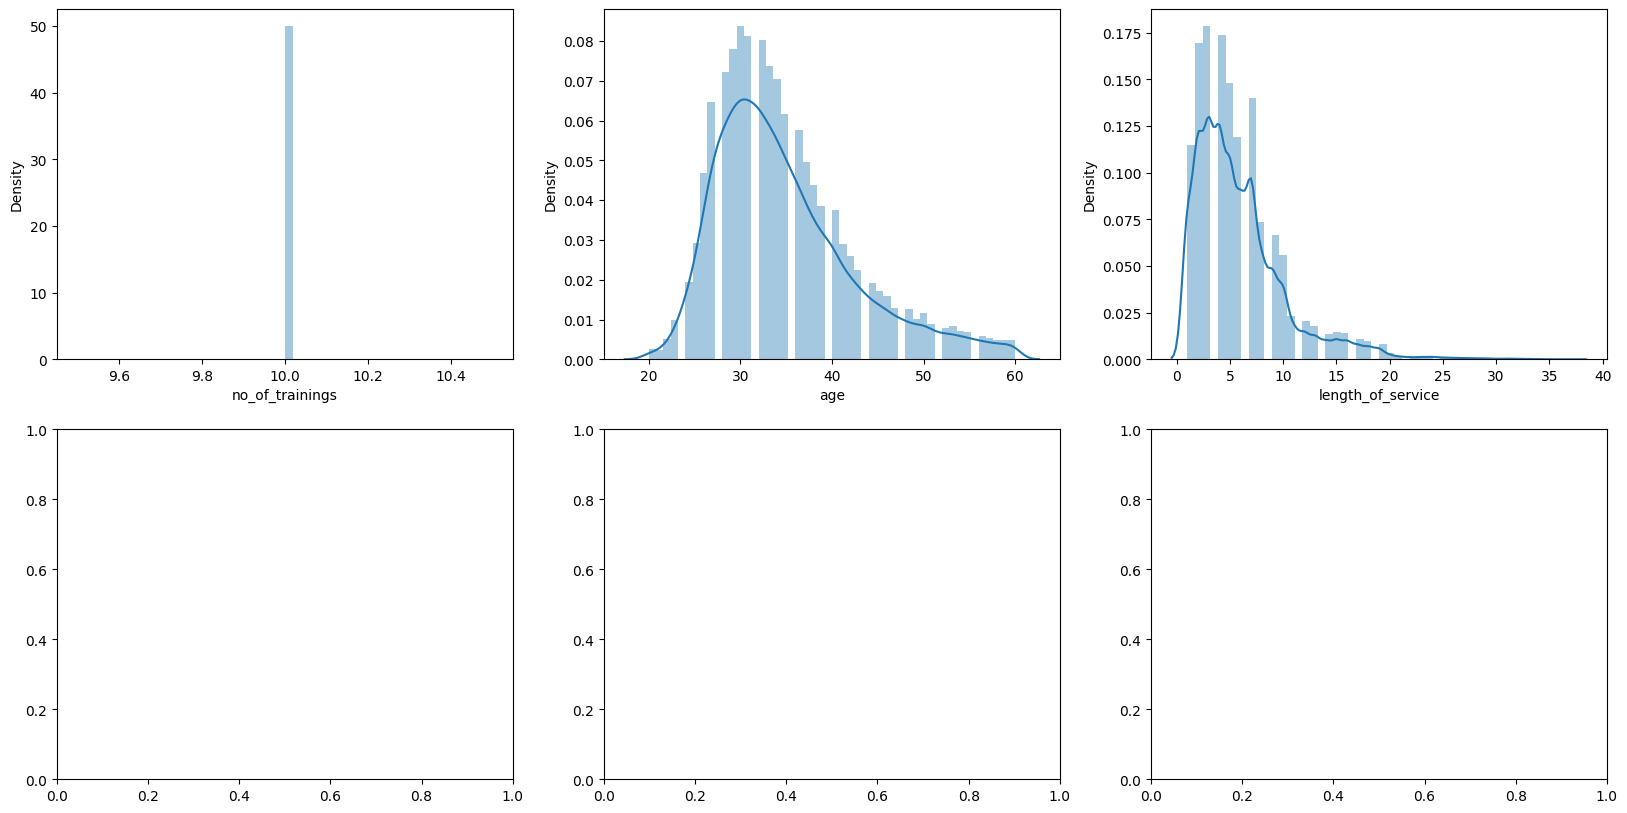

In [17]:
# Check distributions of features contain numbers by distplot
columns = ['no_of_trainings', 'age', 'length_of_service', 'avg_training_score', 'is_promoted']
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

for i, feature in enumerate(data[columns]):
    row = int(i/4)
    col = i%4
    sns.distplot(data[columns].iloc[:, i], ax=axs[row][col])

plt.suptitle('Distirbution of features')
plt.tight_layout

## Comment
As you can see above, none of columns have normal distribution which is proper for training  
Therefore, we can try converting following columns for normal distribution: 'age', 'length_of_service' and 'avg_training_score' 

In [18]:
data

,name,email,designation,age,length_of_service,is_promoted,no_of_trainings,avg_training_score
0,Liam Kelly,liam@gmail.com,Sales & Marketing,35,8,0,10,49.0
1,Uma Taylor,uma@gmail.com,Operations,30,4,0,10,60.0
2,Quincy Davis,quincy@gmail.com,Sales & Marketing,34,7,0,10,50.0
3,Rachel Smith,rachel@gmail.com,Sales & Marketing,39,10,0,10,50.0
4,Sam Smith,sam@gmail.com,Technology,45,2,0,10,73.0
...,...,...,...,...,...,...,...,...
52243,Quincy Thompson,quincy_thompson992@gmail.com,Sales & Marketing,31,2,0,10,49.0
52244,Yvonne Edwards,yvonne_edwards515@gmail.com,Technology,48,17,0,10,78.0
52245,Isabella Phillips,isabella_phillips151@gmail.com,Operations,37,6,0,10,56.0
52246,Catherine Martinez,catherine_martinez355@gmail.com,Analytics,27,3,0,10,79.0


In [19]:
# Log Transformation
age_log = np.log1p(data['age'])
service_log = np.log1p(data['length_of_service'])
score_log = np.log1p(data['avg_training_score'])

data.insert(6, 'age_log', age_log)
data.insert(9, 'length_of_service_log', service_log)
data.insert(12, 'avg_training_score_log', score_log)

data

IndexError: index 12 is out of bounds for axis 0 with size 10

KeyError: 'avg_training_score_log'

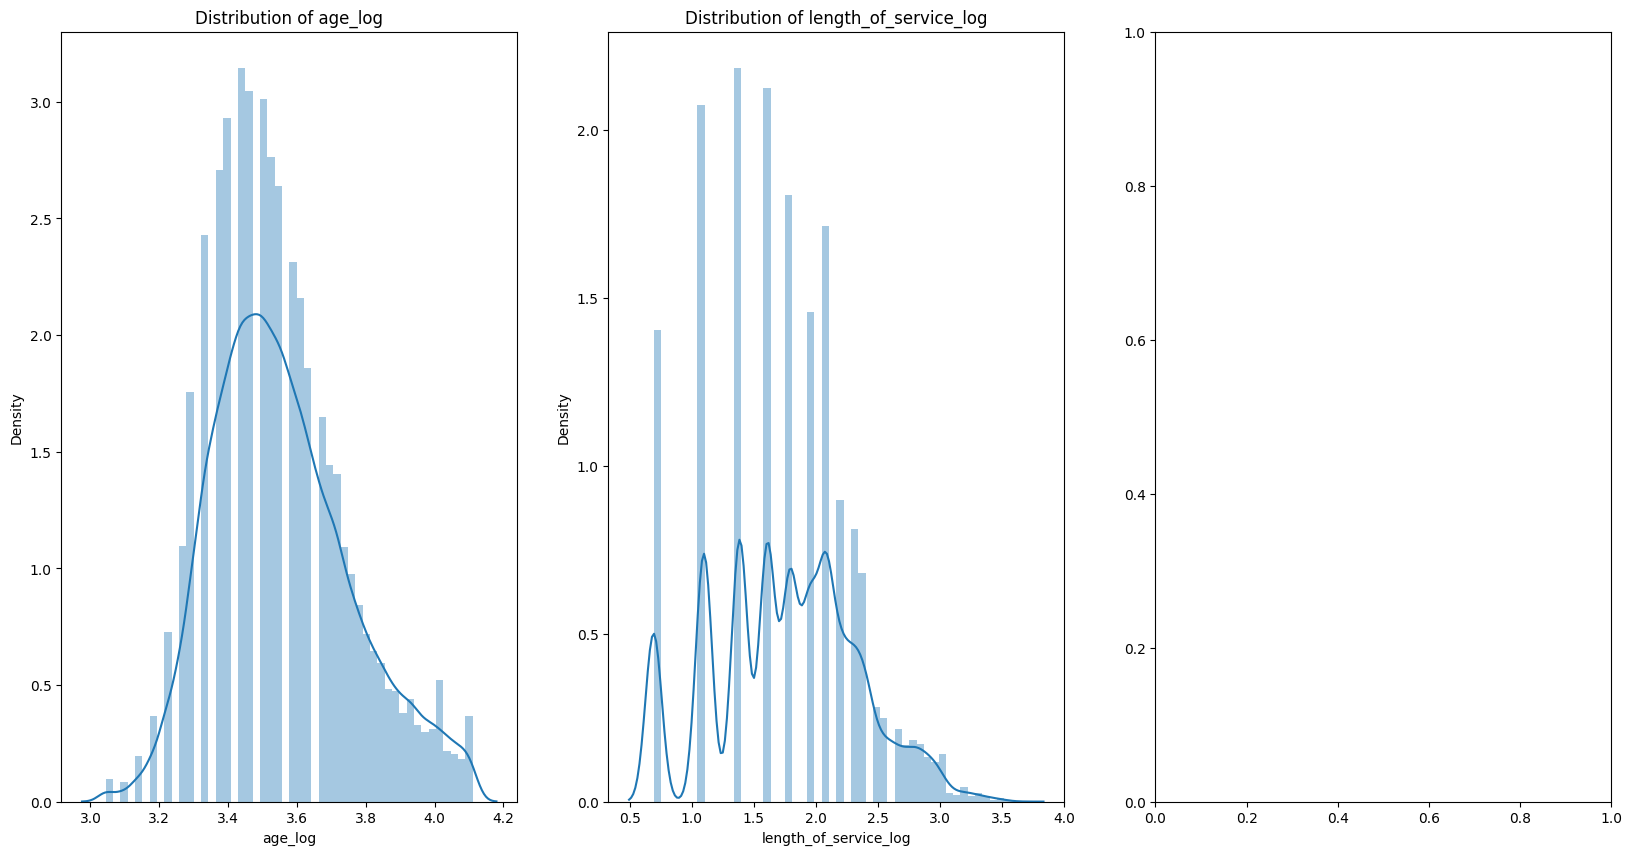

In [20]:
# Check distributions of log converted columns
log_columns = ['age_log', 'length_of_service_log', 'avg_training_score_log']

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))

sns.distplot(data['age_log'], ax=ax1)
ax1.set_title('Distribution of age_log')
sns.distplot(data['length_of_service_log'], ax=ax2)
ax2.set_title('Distribution of length_of_service_log')
sns.distplot(data['avg_training_score_log'], ax=ax3)
ax3.set_title('Distribution of avg_training_score_log')

plt.suptitle('Distribution of log converted features', fontweight='bold')
plt.tight_layout()
plt.show()

## Comment
'age_log' became nearly normal distributed but other features didn't  
Log transformation is one of the most powerful strategies of preparing data for training

ValueError: could not convert string to float: 'Liam Kelly'

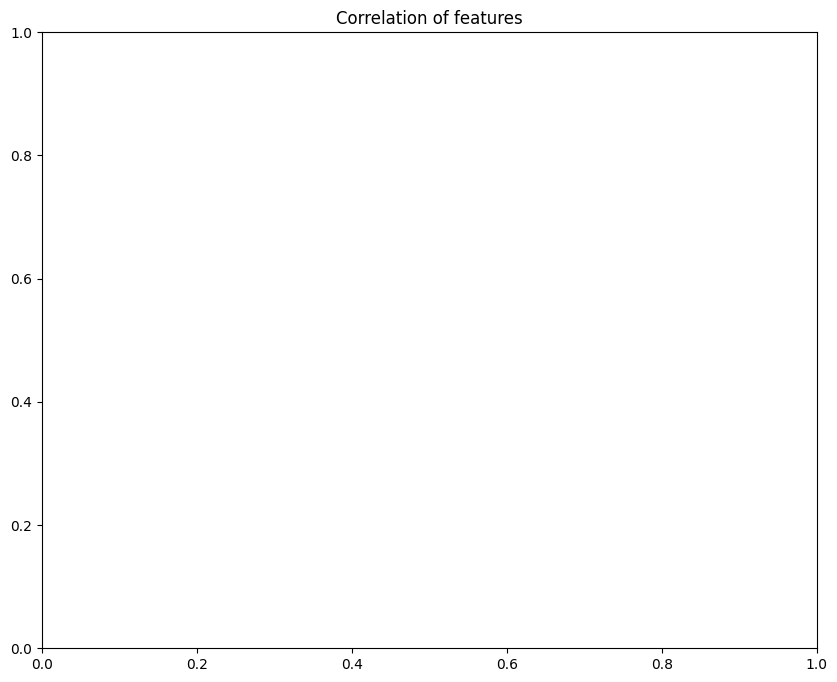

In [21]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
plt.title('Correlation of features')
sns.heatmap(data.corr(), annot=True, linewidths=.5, cmap="YlGnBu")

## Comment
As I anticipated, 'age', 'length of service' and 'avg_training_score' was highly correlated  
So, maybe I can try decomposition for those features (To be Continued)

# Split Datasets

In [22]:
# Get One-Hot encoded DataFrame
data_oh = pd.get_dummies(data)
data_oh

,age,length_of_service,is_promoted,age_log,no_of_trainings,avg_training_score,length_of_service_log,name_Alice Baker,name_Alice Brooks,name_Alice Brown,...,email_zach_wood968@gmail.com,designation_Analytics,designation_Finance,designation_HR,designation_Legal,designation_Operations,designation_Procurement,designation_R&D,designation_Sales & Marketing,designation_Technology
0,35,8,0,3.583519,10,49.0,2.197225,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,30,4,0,3.433987,10,60.0,1.609438,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,34,7,0,3.555348,10,50.0,2.079442,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,39,10,0,3.688879,10,50.0,2.397895,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,45,2,0,3.828641,10,73.0,1.098612,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52243,31,2,0,3.465736,10,49.0,1.098612,False,False,False,...,False,False,False,False,False,False,False,False,True,False
52244,48,17,0,3.891820,10,78.0,2.890372,False,False,False,...,False,False,False,False,False,False,False,False,False,True
52245,37,6,0,3.637586,10,56.0,1.945910,False,False,False,...,False,False,False,False,False,True,False,False,False,False
52246,27,3,0,3.332205,10,79.0,1.386294,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [ ]:
# Scaling of features
features = np.array(data_oh.columns).reshape(-1, 1)

for feature in features:
    scaler = StandardScaler()
    scaler.fit(data_oh[feature])
    data_oh[feature] = scaler.transform(data_oh[feature])

data_oh

In [15]:
# Define features and label for training
train_features = data_oh.drop(columns=['is_promoted'], inplace=False)
train_label = data_oh['is_promoted'].astype(int)

In [16]:
# Split datasets
X_train, X_test, y_train, y_test = train_test_split(train_features, train_label, test_size=0.2, random_state=11)

print('Shape of X_train: ', X_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (37104, 59)
Shape of X_test:  (9276, 59)
Shape of y_train:  (37104,)
Shape of y_test:  (9276,)


# Classification

## Basic Estimators

In [17]:
# Utility Function
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average="macro")
    recall = recall_score(y_test, pred, average="macro")
    f1 = f1_score(y_test, pred, average="macro")
    roc_auc = roc_auc_score(y_test, pred_proba, average="macro")
    print('Confusion Matrix')
    print(confusion)
    print('Accuracy: {0:.4f}, Precision: {1:.4f}, Recall {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [18]:
# Process fitting, prediction and evalution by Logistic Regression
# Create Estimator CLass
dt_clf = DecisionTreeClassifier()
lr_clf = LogisticRegression()
rf_clf = RandomForestClassifier()

# Fitting
dt_clf.fit(X_train, y_train)
lr_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

# Prediction
dt_pred = dt_clf.predict(X_test)
lr_pred = lr_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)

# Pred_Proba
dt_pred_proba = dt_clf.predict_proba(X_test)[:, 1]
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]
rf_pred_proba = rf_clf.predict_proba(X_test)[:, 1]

# Evaluation
get_clf_eval(y_test, dt_pred, dt_pred_proba)
get_clf_eval(y_test, lr_pred, lr_pred_proba)
get_clf_eval(y_test, rf_pred, rf_pred_proba)

Confusion Matrix
[[7858  615]
 [ 439  364]]
Accuracy: 0.8864, Precision: 0.6594, Recall 0.6904, F1: 0.6728, AUC:0.6903
Confusion Matrix
[[8458   15]
 [ 515  288]]
Accuracy: 0.9429, Precision: 0.9466, Recall 0.6784, F1: 0.7452, AUC:0.8070
Confusion Matrix
[[8447   26]
 [ 511  292]]
Accuracy: 0.9421, Precision: 0.9306, Recall 0.6803, F1: 0.7451, AUC:0.7914


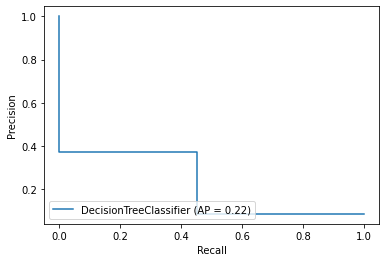

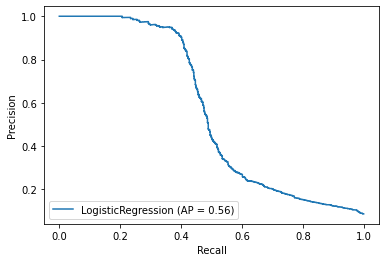

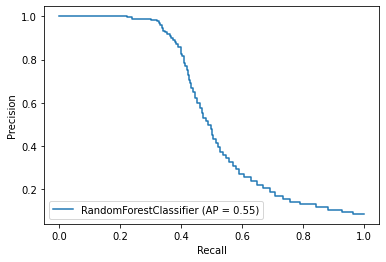

In [19]:
# Plot Precision-Recall curve
plot_precision_recall_curve(dt_clf, X_test, y_test)
plot_precision_recall_curve(lr_clf, X_test, y_test)
plot_precision_recall_curve(rf_clf, X_test, y_test)
plt.show()

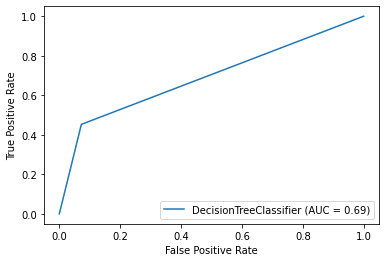

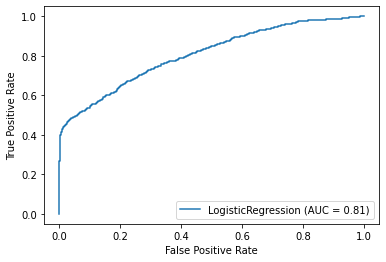

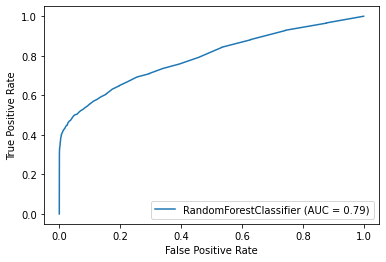

In [20]:
# Plot ROC curve
plot_roc_curve(dt_clf, X_test, y_test)
plot_roc_curve(lr_clf, X_test, y_test)
plot_roc_curve(rf_clf, X_test, y_test)
plt.show()

### Comment
As you can see above, LogisticRegression and RandomForestClassifier are both basic models but really powerful

## LightGBM

Confusion Matrix
[[8392   81]
 [ 468  335]]
Accuracy: 0.9408, Precision: 0.8762, Recall 0.7038, F1: 0.7590, AUC:0.8152


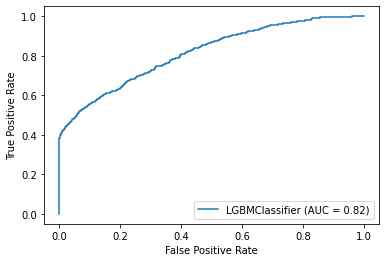

In [21]:
# Create estimator and process fitting, prediction and evaluation for model after applying SMOTE
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)

lgbm_clf.fit(X_train, y_train)
lgbm_preds_over = lgbm_clf.predict(X_test)
lgbm_pred_proba = lgbm_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, lgbm_preds_over, lgbm_pred_proba)
plot_roc_curve(lgbm_clf, X_test, y_test)

In [22]:
# Create estimator and process fitting, prediction and evaluation for model
lgbm_wrapper = LGBMClassifier(n_estimators=400, num_leaves=64, n_jobs=-1, boost_from_average=False)

evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=1200, eval_metric='logloss', eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, preds, pred_proba)

[1]	valid_0's binary_logloss: 0.618231
Training until validation scores don't improve for 1200 rounds
[2]	valid_0's binary_logloss: 0.557051
[3]	valid_0's binary_logloss: 0.506116
[4]	valid_0's binary_logloss: 0.463184
[5]	valid_0's binary_logloss: 0.426587
[6]	valid_0's binary_logloss: 0.395593
[7]	valid_0's binary_logloss: 0.369138
[8]	valid_0's binary_logloss: 0.346575
[9]	valid_0's binary_logloss: 0.326873
[10]	valid_0's binary_logloss: 0.310296
[11]	valid_0's binary_logloss: 0.296102
[12]	valid_0's binary_logloss: 0.282965
[13]	valid_0's binary_logloss: 0.27152
[14]	valid_0's binary_logloss: 0.261609
[15]	valid_0's binary_logloss: 0.252928
[16]	valid_0's binary_logloss: 0.245789
[17]	valid_0's binary_logloss: 0.239263
[18]	valid_0's binary_logloss: 0.23392
[19]	valid_0's binary_logloss: 0.228856
[20]	valid_0's binary_logloss: 0.224366
[21]	valid_0's binary_logloss: 0.220649
[22]	valid_0's binary_logloss: 0.217218
[23]	valid_0's binary_logloss: 0.214103
[24]	valid_0's binary_loglos

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

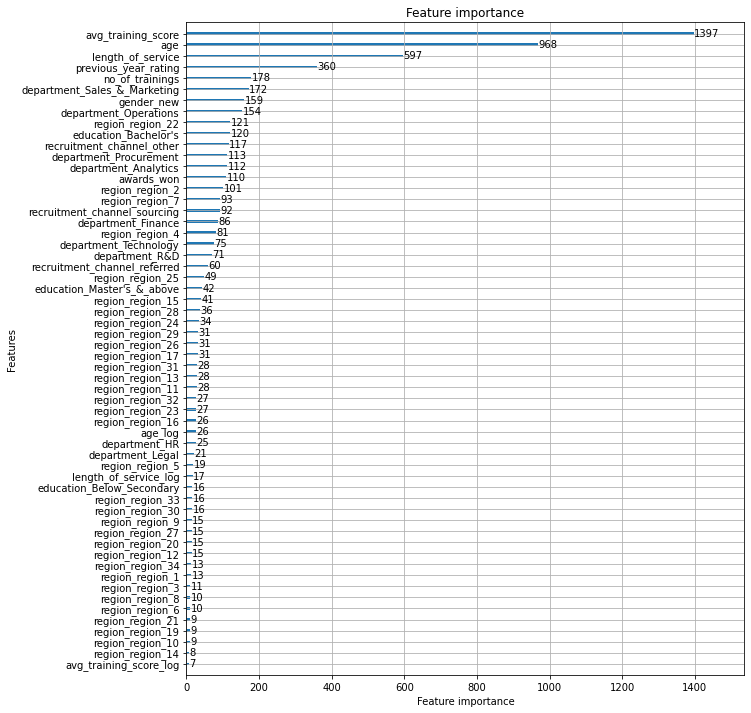

In [23]:
# Plot Feature importance
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)

### Comment
LightGBM is also another powerful model which runs by Boosting(Boot Strapping)  
It is more lighter than GradientBoostingClassifier(literally)  
Specifically, comparing to basic estimators, AUC score was the highest

## Stacking Ensemble

In [24]:
# Create individual ML model
knn_clf = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=11)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# Create the model which will be fitted by dataset Stacking processed
lr_final = LogisticRegression(C=10)

In [25]:
# Fitting each models
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [26]:
# Predict each models and predict them

knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

print('Accuracy Score of KNN: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('Accuracy Score of RandomForestClassifier: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('Accuracy Score of DeicisionTreeClassifier: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('Accuracy Score of AdaBoostClassifier: {0:.4f}'.format(accuracy_score(y_test, ada_pred)))

Accuracy Score of KNN: 0.9166
Accuracy Score of RandomForestClassifier: 0.9420
Accuracy Score of DeicisionTreeClassifier: 0.8890
Accuracy Score of AdaBoostClassifier: 0.9315


In [27]:
# Combine preds to one ndarray
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

# Transponse 'pred' in order to convert as Feature
pred = np.transpose(pred)
print(pred.shape)

(4, 9276)
(9276, 4)


In [28]:
# Fit, Predict, Evaluate for final model
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)

print('Accuracy Score of Final Model: {0:.4f}'.format(accuracy_score(y_test, final)))

Accuracy Score of Final Model: 0.9426


# Conclusion
**Accuracy Score of Final Model: 0.9430**

1. Through trraining basic estimators, LightGBM and ensemble models, I could try lots of estimators for this datset.  
2. Especially, the label for training was binary (which is 0 or 1) so, the evaluation score seems much higher than those from multi-classification.  
3. Also, ensemble and nearest-neighbor model became ditinguished, therefore, visualzing scatter plot could be another good way for analyzing data.

Thanks for reviewing my notebooks  
If you'd like it, please give me upvotes and leave comments  
Any questions or comments are always welcome